In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Load the dataset
data= pd.read_excel(r"C:\Users\HP\Desktop\Appendicitis_Dataset (1) - Copy.xlsx")
data.head()

,Age,BMI,Gender,Height,Weight,Appendix_on_Ultra Sound,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,...,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Management,Severity,Length_of_Stay,Diagnosis,Appendicitis_Score
0,12.68,16.9,female,148.0,37.0,yes,7.1,no,yes,yes,...,0,yes,no,yes,no,0,0,3,1,3.5
1,14.10,31.9,male,147.0,69.5,no,7.8,yes,yes,yes,...,0,yes,no,yes,no,0,0,2,0,4.5
2,14.14,23.3,female,163.0,62.0,no,7.8,no,yes,yes,...,0,yes,no,yes,no,0,0,4,0,4.0
3,16.37,20.6,female,165.0,56.0,no,7.8,yes,yes,no,...,0,yes,no,yes,no,0,0,3,0,6.5
4,11.08,16.9,female,163.0,45.0,yes,7.0,no,yes,yes,...,0,yes,no,yes,no,0,0,3,1,5.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               781 non-null    float64
 2   Gender                            781 non-null    object 
 3   Height                            781 non-null    float64
 4   Weight                            781 non-null    float64
 5   Appendix_on_Ultra Sound           781 non-null    object 
 6   Appendix_Diameter                 781 non-null    float64
 7   Migratory_Pain                    781 non-null    object 
 8   Lower_Right_Abd_Pain              781 non-null    object 
 9   Contralateral_Rebound_Tenderness  781 non-null    object 
 10  Coughing_Pain                     781 non-null    int64  
 11  Nausea                            781 non-null    int64  
 12  Loss_of_

In [4]:
#Checking for null values
data.isna().sum()

Age                                 0
BMI                                 0
Gender                              0
Height                              0
Weight                              0
Appendix_on_Ultra Sound             0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_Urine                    0
RBC_in_Urine                        0
WBC_in_Urine                        0
CRP                                 0
Dysuria                             0
Stool       

In [5]:
#converting data to dataframe
df=pd.DataFrame(data)
df.head()

,Age,BMI,Gender,Height,Weight,Appendix_on_Ultra Sound,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,...,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Management,Severity,Length_of_Stay,Diagnosis,Appendicitis_Score
0,12.68,16.9,female,148.0,37.0,yes,7.1,no,yes,yes,...,0,yes,no,yes,no,0,0,3,1,3.5
1,14.10,31.9,male,147.0,69.5,no,7.8,yes,yes,yes,...,0,yes,no,yes,no,0,0,2,0,4.5
2,14.14,23.3,female,163.0,62.0,no,7.8,no,yes,yes,...,0,yes,no,yes,no,0,0,4,0,4.0
3,16.37,20.6,female,165.0,56.0,no,7.8,yes,yes,no,...,0,yes,no,yes,no,0,0,3,0,6.5
4,11.08,16.9,female,163.0,45.0,yes,7.0,no,yes,yes,...,0,yes,no,yes,no,0,0,3,1,5.5


In [6]:
# Step 3: Preprocessing
# Normalize and map categorical values to numeric
mapping = {
    'Gender': {'male': 1, 'female': 0},
    'Appendix_on_Ultra Sound': {'yes': 1, 'no': 0},
    'Migratory_Pain': {'yes': 1, 'no': 0},
    'Lower_Right_Abd_Pain': {'yes': 1, 'no': 0},
    'Contralateral_Rebound_Tenderness': {'yes': 1, 'no': 0},
        'Psoas_Sign': {'yes': 1, 'no': 0},
    'Ipsilateral_Rebound_Tenderness': {'yes': 1, 'no': 0},
    'US_Performed': {'yes': 1, 'no': 0},
    'Free_Fluids': {'yes': 1, 'no': 0},
    
    
}
df

,Age,BMI,Gender,Height,Weight,Appendix_on_Ultra Sound,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,...,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Management,Severity,Length_of_Stay,Diagnosis,Appendicitis_Score
0,12.68,16.9,female,148.0,37.0,yes,7.1,no,yes,yes,...,0,yes,no,yes,no,0,0,3,1,3.5
1,14.10,31.9,male,147.0,69.5,no,7.8,yes,yes,yes,...,0,yes,no,yes,no,0,0,2,0,4.5
2,14.14,23.3,female,163.0,62.0,no,7.8,no,yes,yes,...,0,yes,no,yes,no,0,0,4,0,4.0
3,16.37,20.6,female,165.0,56.0,no,7.8,yes,yes,no,...,0,yes,no,yes,no,0,0,3,0,6.5
4,11.08,16.9,female,163.0,45.0,yes,7.0,no,yes,yes,...,0,yes,no,yes,no,0,0,3,1,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.41,25.3,female,166.5,70.0,yes,7.5,yes,yes,no,...,1,yes,no,yes,no,1,0,4,1,7.5
777,17.09,20.4,female,158.0,51.0,no,7.8,no,no,no,...,1,no,no,yes,no,1,1,6,1,4.0
778,14.99,19.9,female,152.0,46.0,no,7.8,no,yes,no,...,0,no,no,yes,yes,1,0,4,1,4.0
779,7.20,14.3,male,129.3,23.9,yes,14.0,yes,yes,no,...,1,no,no,yes,yes,1,0,5,1,8.5


In [7]:
for col, map_dict in mapping.items():
    df[col] = df[col].str.lower().str.strip().map(map_dict)
# Verify preprocessing
df

,Age,BMI,Gender,Height,Weight,Appendix_on_Ultra Sound,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,...,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Management,Severity,Length_of_Stay,Diagnosis,Appendicitis_Score
0,12.68,16.9,0,148.0,37.0,1,7.1,0,1,1,...,0,1,0,1,0,0,0,3,1,3.5
1,14.10,31.9,1,147.0,69.5,0,7.8,1,1,1,...,0,1,0,1,0,0,0,2,0,4.5
2,14.14,23.3,0,163.0,62.0,0,7.8,0,1,1,...,0,1,0,1,0,0,0,4,0,4.0
3,16.37,20.6,0,165.0,56.0,0,7.8,1,1,0,...,0,1,0,1,0,0,0,3,0,6.5
4,11.08,16.9,0,163.0,45.0,1,7.0,0,1,1,...,0,1,0,1,0,0,0,3,1,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,12.41,25.3,0,166.5,70.0,1,7.5,1,1,0,...,1,1,0,1,0,1,0,4,1,7.5
777,17.09,20.4,0,158.0,51.0,0,7.8,0,0,0,...,1,0,0,1,0,1,1,6,1,4.0
778,14.99,19.9,0,152.0,46.0,0,7.8,0,1,0,...,0,0,0,1,1,1,0,4,1,4.0
779,7.20,14.3,1,129.3,23.9,1,14.0,1,1,0,...,1,0,0,1,1,1,0,5,1,8.5


In [8]:
# Step 5: Feature Selection
# Drop non-relevant features
X = df.drop(['Diagnosis', 'Severity', 'Coughing_Pain','Management'], axis=1)  # Features
y = df['Management']  # Target variable


In [9]:
# Step 6: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

In [10]:
rf_model = RandomForestClassifier(random_state=80)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [11]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Results:
Accuracy: 0.9426751592356688
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        97
           1       0.93      0.92      0.92        60

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94      0.94      0.94       157

Confusion Matrix:
 [[93  4]
 [ 5 55]]


In [12]:
# ----------------- Gradient Boosting Classifier -----------------
gb_model = GradientBoostingClassifier(random_state=80)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [13]:
print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))


Gradient Boosting Results:
Accuracy: 0.910828025477707
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        97
           1       0.90      0.87      0.88        60

    accuracy                           0.91       157
   macro avg       0.91      0.90      0.90       157
weighted avg       0.91      0.91      0.91       157

Confusion Matrix:
 [[91  6]
 [ 8 52]]


In [14]:
# ----------------- Logistic Regression -----------------
lr_model = LogisticRegression(max_iter=1000, random_state=80)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [15]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))


Logistic Regression Results:
Accuracy: 0.9363057324840764
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        97
           1       0.93      0.90      0.92        60

    accuracy                           0.94       157
   macro avg       0.94      0.93      0.93       157
weighted avg       0.94      0.94      0.94       157

Confusion Matrix:
 [[93  4]
 [ 6 54]]



Feature Importances:
 Length_of_Stay                      0.305611
Peritonitis                         0.131206
CRP                                 0.067081
WBC_Count                           0.064232
Appendix_Diameter                   0.055955
Neutrophil_Percentage               0.039379
Appendicitis_Score                  0.035400
Age                                 0.028655
Weight                              0.027081
Body_Temperature                    0.026817
BMI                                 0.026010
Thrombocyte_Count                   0.022715
Height                              0.022373
RDW                                 0.019944
Hemoglobin                          0.019606
RBC_Count                           0.016028
Free_Fluids                         0.009694
Neutrophilia                        0.009138
US_Performed                        0.008853
Ketones_in_Urine                    0.008338
Contralateral_Rebound_Tenderness    0.008177
Loss_of_Appetite                

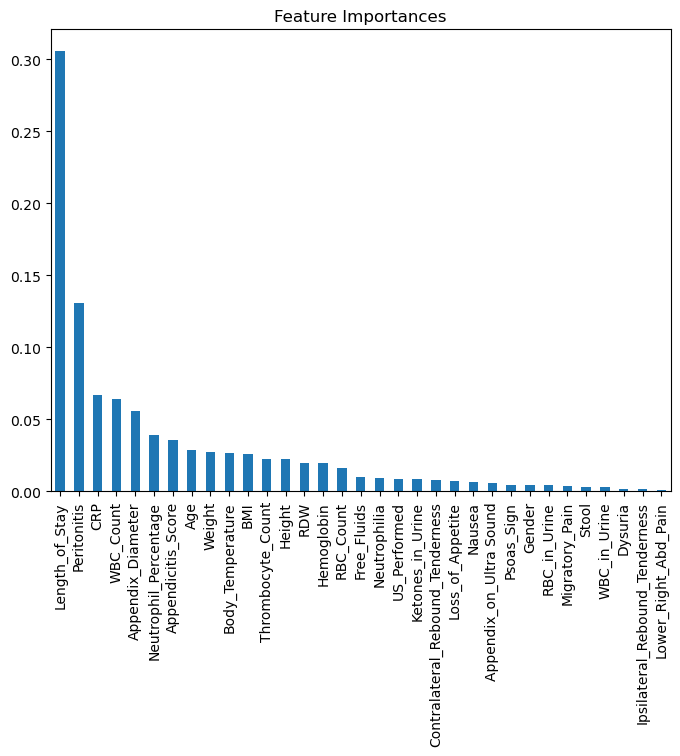

In [16]:
# Feature importance
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
print("\nFeature Importances:\n", feature_importances)
# Step 9: Visualizing Feature Importance
feature_importances.plot(kind='bar', title='Feature Importances')
plt.show()


Feature Importances:
 Length_of_Stay                      0.706285
Peritonitis                         0.077763
Appendix_Diameter                   0.047231
Neutrophil_Percentage               0.026969
WBC_Count                           0.021523
Weight                              0.019815
CRP                                 0.018531
Height                              0.013231
BMI                                 0.011421
US_Performed                        0.010046
Body_Temperature                    0.007645
Hemoglobin                          0.007244
Appendicitis_Score                  0.007220
Thrombocyte_Count                   0.007007
Age                                 0.005482
Ketones_in_Urine                    0.003252
RDW                                 0.002438
Appendix_on_Ultra Sound             0.002139
Psoas_Sign                          0.000835
Contralateral_Rebound_Tenderness    0.000643
Gender                              0.000602
Stool                           

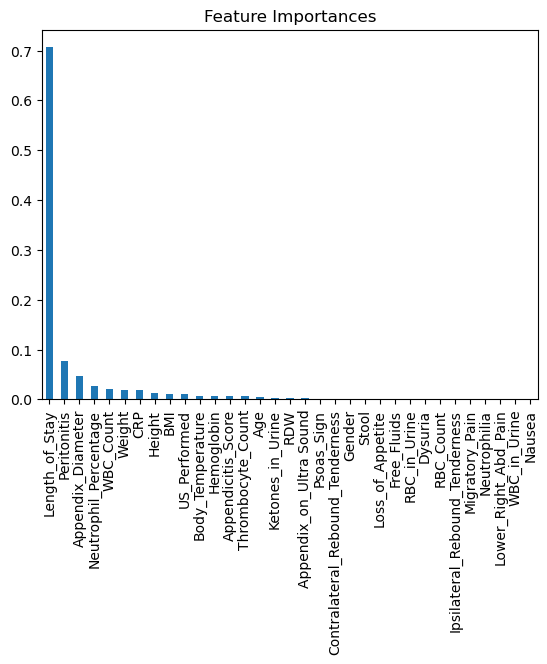

In [17]:
# Feature importance
import pandas as pd
feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)
# Step 9: Visualizing Feature Importance
feature_importances.plot(kind='bar', title='Feature Importances')
plt.show()